In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [521]:
def midpoint_method(x_0, N, T, f, params, k = 1):

    Del = T / N
    A = [x_0.copy()]
    
    t = 0

    for i in range(N * k):
        
        k_t = x_0 + Del / 2 * f(t, x_0, params)
        x_0 += Del * f(t + Del / 2, k_t, params)
        A.append(x_0.copy())
        
        t += Del

    return A

In [522]:
def pop_model(t, x, params):
    
    c, mu, nu, alpha, beta, gamma, delta, r = params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7]
    
    eat = alpha * x[0] * x[1] / (beta + x[0])
    del_x = r * x[0] * (1 - c * x[0] / r) * ((x[0] - mu) / (x[0] + nu)) - eat
    del_y = gamma * eat - delta * x[1]
    
    return np.array([del_x, del_y])

In [523]:
c = 0.19
mu = 0.03
nu = 0.003
alpha = 800
beta = 1.5
gamma = 0.004
delta = 2.2

params = [c, mu, nu, alpha, beta, gamma, delta]

r_0 = c * delta * beta / (gamma * alpha - delta)

r_grid = []

for r in range(61):
    if r / 20 > r_0:
        r_grid.append(r / 20)
        

In [524]:
def compute_poincare_fixed_point(x_grid, y_grid, N, f, params, epsilon):
    
    return_list = []
    
    argmin = [0,0]
    min_norm = 10000
    
    for x_i in range(len(x_grid)):
        y_list = []
        for y_i in range(len(y_grid)):
            
            x_o = x_grid[x_i]
            y_o = y_grid[y_i]
            x_0 = np.array([x_o, y_o])
            
            path = midpoint_method(x_0.copy(), N, 1000, f, params)
            A = np.array(path)

            y = A[:,1]
            x = A[:,0]

            norm_list = [np.linalg.norm(np.array([x_o, y_o]) - np.array([x[i], y[i]])) for i in range(int(len(x) / 2), len(x))]
            norm = min(np.array(norm_list))

            if norm <= min_norm:
                min_norm = norm
                argmin = [x_i, y_i]
            
    print(min_norm)
    
    if min_norm == 10000:
        return []
    else:
        return argmin
            
            

In [525]:

returns = []
returns_de_indexed = []

r_grid = np.array(r_grid)
r_grid = r_grid[(1.55 <= r_grid) & (r_grid <= 2.6)]

for i in range(len(r_grid)):
    
    print(r_grid[i], end = " ")
    r = r_grid[i]

    params_r = params.copy()
    params_r.append(r)

    fixed_point_x = delta * beta / (gamma * alpha - delta)
    fixed_point_y = (r - c * fixed_point_x) * (fixed_point_x - mu) * (fixed_point_x + beta) / (alpha * (fixed_point_x + nu))

    x_grid = [fixed_point_x]
    y_grid = [i / 100000 for i in range(1, math.floor(100000 * fixed_point_y))]

    fp_i = compute_poincare_fixed_point(x_grid, y_grid, 10000, pop_model, params_r, 0.001)
    print(len(y_grid))
    print(fp_i)
    if fp_i != []:
        print(x_grid[fp_i[0]], y_grid[fp_i[1]])

    returns.append(fp_i)
    if fp_i != []:
        returns_de_indexed.append([x_grid[fp_i[0]], y_grid[fp_i[1]]])
    else: returns_de_indexed.append([])
        
    print(returns)
    

1.55 6.453530425058508e-05
547
[0, 414]
3.3000000000000003 0.00415
[[0, 414]]
1.6 6.575046993203067e-05
576
[0, 338]
3.3000000000000003 0.00339
[[0, 414], [0, 338]]
1.65 8.8442113262092e-05
606
[0, 283]
3.3000000000000003 0.00284
[[0, 414], [0, 338], [0, 283]]
1.7 0.00010045846683219097
636
[0, 245]
3.3000000000000003 0.00246
[[0, 414], [0, 338], [0, 283], [0, 245]]
1.75 8.171302920910059e-05
666
[0, 226]
3.3000000000000003 0.00227
[[0, 414], [0, 338], [0, 283], [0, 245], [0, 226]]
1.8 5.1586047581270437e-05
695
[0, 197]
3.3000000000000003 0.00198
[[0, 414], [0, 338], [0, 283], [0, 245], [0, 226], [0, 197]]
1.85 0.0001266101218407884
725
[0, 181]
3.3000000000000003 0.00182
[[0, 414], [0, 338], [0, 283], [0, 245], [0, 226], [0, 197], [0, 181]]
1.9 0.00013759893146237366
755
[0, 143]
3.3000000000000003 0.00144
[[0, 414], [0, 338], [0, 283], [0, 245], [0, 226], [0, 197], [0, 181], [0, 143]]
1.95 0.00013663807936200052
784
[0, 141]
3.3000000000000003 0.00142
[[0, 414], [0, 338], [0, 283], 

In [526]:
r = 1.5

params_r = params.copy()
params_r.append(r)

r = r_grid[i]

x_0 = np.array([3.3000000000000003, 0.003])

path = midpoint_method(x_0.copy(), 100000, 300, pop_model, params_r)
A = np.array(path)

y = A[:,1]
x = A[:,0]


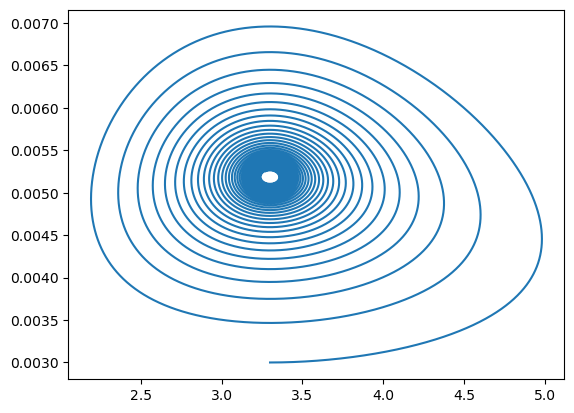

In [527]:
plt.plot(x,y)

In [528]:
returns

[[0, 414],
 [0, 338],
 [0, 283],
 [0, 245],
 [0, 226],
 [0, 197],
 [0, 181],
 [0, 143],
 [0, 141],
 [0, 105],
 [0, 101],
 [0, 101],
 [0, 94],
 [0, 46],
 [0, 42],
 [0, 47],
 [0, 40],
 [0, 22],
 [0, 17],
 [0, 5],
 [0, 15],
 [0, 25]]

In [529]:
def get_determinant(x_path, y_path, diff, params):
    
    c, mu, nu, alpha, beta, gamma, delta, r = params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7]
    
    integral = 0
    
    for i in range(len(x_path)):
        
        x = x_path[i]
        y = y_path[i]
        
        A_11 = -2 * c * x ** 3 + r * x ** 2 + c * mu * x ** 2 - 3 * c * nu * x ** 2 + 2 * r * nu * x + 2 * c * mu * nu * x - r * mu * nu
        A_11 = A_11 / ((x + nu) ** 2)
        A_11 = A_11 - alpha * y * beta / ((x + beta) ** 2)
        
        A_22 = gamma * alpha * x / (x + beta) - delta
        
        integral += (A_11 + A_22) * diff

    return np.exp(integral)
    

1.55 [3.3000000000000003, 0.00415]
[3.3     0.00415]
1.6 [3.3000000000000003, 0.00339]
[3.3     0.00339]
1.65 [3.3000000000000003, 0.00284]
[3.30e+00 2.84e-03]
1.7 [3.3000000000000003, 0.00246]
[3.30e+00 2.46e-03]
1.75 [3.3000000000000003, 0.00227]
[3.30e+00 2.27e-03]
1.8 [3.3000000000000003, 0.00198]
[3.30e+00 1.98e-03]
1.85 [3.3000000000000003, 0.00182]
[3.30e+00 1.82e-03]
1.9 [3.3000000000000003, 0.00144]
[3.30e+00 1.44e-03]
1.95 [3.3000000000000003, 0.00142]
[3.30e+00 1.42e-03]
2.0 [3.3000000000000003, 0.00106]
[3.30e+00 1.06e-03]
2.05 [3.3000000000000003, 0.00102]
[3.30e+00 1.02e-03]
2.1 [3.3000000000000003, 0.00102]
[3.30e+00 1.02e-03]
2.15 [3.3000000000000003, 0.00095]
[3.3e+00 9.5e-04]
2.2 [3.3000000000000003, 0.00047]
[3.3e+00 4.7e-04]
2.25 [3.3000000000000003, 0.00043]
[3.3e+00 4.3e-04]
2.3 [3.3000000000000003, 0.00048]
[3.3e+00 4.8e-04]
2.35 [3.3000000000000003, 0.00041]
[3.3e+00 4.1e-04]
2.4 [3.3000000000000003, 0.00023]
[3.3e+00 2.3e-04]
2.45 [3.3000000000000003, 0.00018]


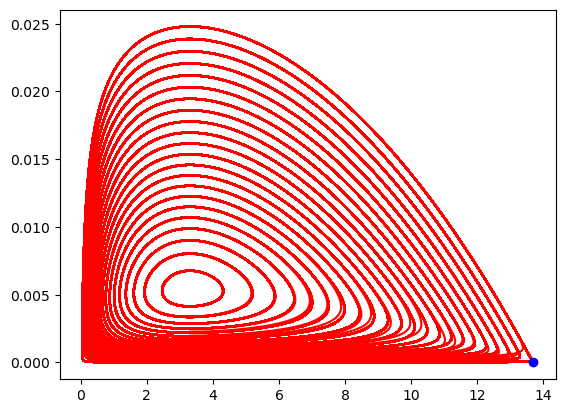

In [544]:
period_list = []
period_list_i = []
det_list = []
r_list = []


for i in range(len(r_grid)):
    
    print(r_grid[i], end = " ")
    r = r_grid[i]
    
    if r >= 1.55:

        params_r = params.copy()
        params_r.append(r)

        x_0 = returns_de_indexed[i]
        print(x_0)
        if len(x_0) > 0:
            x_0 = np.array(x_0)

            path = midpoint_method(x_0.copy(), 100000, 1000, pop_model, params_r)
            A = np.array(path)

            y = A[:,1]
            x = A[:,0]
            plt.plot(x,y, color="red")
            print(x_0)
#             first_cross_index = np.where((abs(y - x_0[1]) <= 0.01) & (abs(x - x_0[0]) <= 0.01))[0]
#             first_cross_index = first_cross_index[first_cross_index >= 10]
            
            try:
                first_cross_index = 75000
                diam_y = max(y[first_cross_index:]) - min(y[first_cross_index:])
                diam_x = max(x[first_cross_index:]) - min(x[first_cross_index:])
                og_index = first_cross_index
                x_1 = np.array([x[first_cross_index], y[first_cross_index]])
                first_cross_index = np.where((abs(y - x_1[1]) <= diam_y / 10) & (abs(x - x_1[0]) <= diam_x / 10))[0]
                first_cross_index = first_cross_index[first_cross_index >= og_index + 500]
                first_cross_index = first_cross_index[0]
                
                period_list.append((first_cross_index - og_index) / 100)
                period_list_i.append(i)

                det = get_determinant(x[og_index:first_cross_index+1], y[og_index:first_cross_index+1], 1000 / 100000, params_r)
                det_list.append(det)
                r_list.append(r)

            except: pass
            
plt.plot([r / c],[0],color="blue",marker="o")


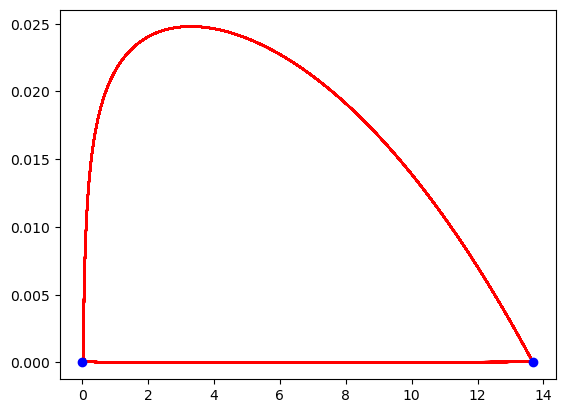

In [549]:
y = A[:,1]
x = A[:,0]
plt.plot(x[300:],y[300:], color="red")

plt.plot([r / c],[0],color="blue",marker="o")
plt.plot([0],[0],color="blue",marker="o")

In [543]:
print(period_list)
print(det_list)

[7.79, 7.91, 8.01, 8.06, 8.18, 8.3, 8.15, 8.42, 8.65, 8.56, 8.75, 9.4, 9.52, 8.59, 9.73, 10.19, 10.36, 10.64, 11.04, 11.96, 12.92, 15.69]
[0.8494044929249739, 0.6315820220151179, 0.45751997230205665, 0.30720192455680945, 0.24505970963672086, 0.16100409542957206, 0.15541884993812102, 0.06747672381411353, 0.05108436903531352, 0.022856981730667764, 0.026473109420660206, 0.010330732688250693, 0.004865490246440638, 0.012814493221795065, 0.001966043374613997, 0.0006615609510978182, 0.0004028454096485962, 0.0002073242646496608, 8.049689146107839e-05, 1.4347348020296006e-05, 2.3324975054915195e-06, 1.7911297235254527e-08]


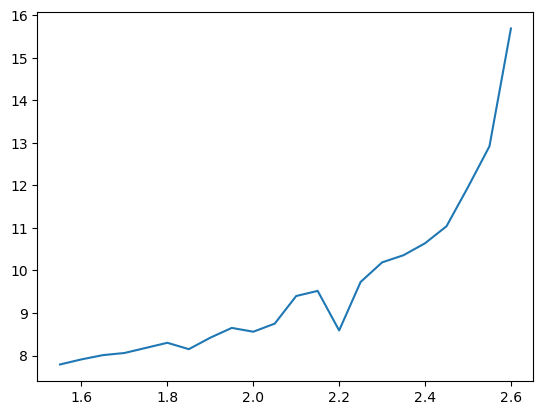

In [532]:
plt.plot(np.array(r_list)[np.array(r_list) >= 1.55], np.array(period_list)[np.array(r_list) >= 1.55])

(0.0, 1.0)

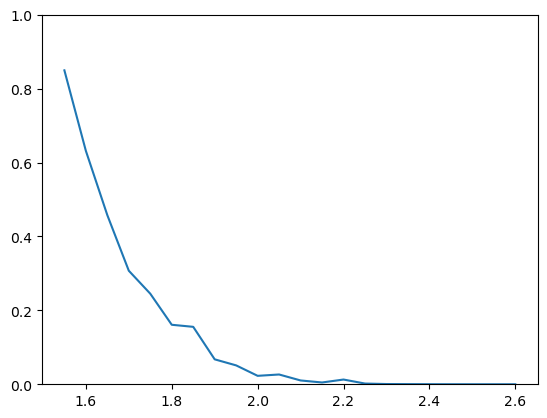

In [533]:
plt.plot(r_list, det_list)
plt.ylim(0,1)

In [534]:
det_list

[0.8494044929249739,
 0.6315820220151179,
 0.45751997230205665,
 0.30720192455680945,
 0.24505970963672086,
 0.16100409542957206,
 0.15541884993812102,
 0.06747672381411353,
 0.05108436903531352,
 0.022856981730667764,
 0.026473109420660206,
 0.010330732688250693,
 0.004865490246440638,
 0.012814493221795065,
 0.001966043374613997,
 0.0006615609510978182,
 0.0004028454096485962,
 0.0002073242646496608,
 8.049689146107839e-05,
 1.4347348020296006e-05,
 2.3324975054915195e-06,
 1.7911297235254527e-08]

1.7
[3.3e+00 1.0e-03]
[3.3e+00 2.0e-03]
[3.3e+00 3.0e-03]
[3.3   0.004]
[3.3   0.005]


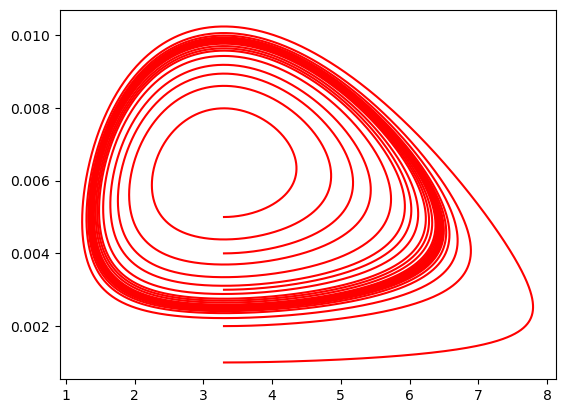

In [535]:
period_list = []
period_list_i = []
det_list = []
r_list = []

r = r_grid[3]
print(r)

fixed_point_x = delta * beta / (gamma * alpha - delta)
fixed_point_y = (r - c * fixed_point_x) * (fixed_point_x - mu) * (fixed_point_x + beta) / (alpha * (fixed_point_x + nu))

x_grid = [fixed_point_x]
y_grid = [i / 1000 for i in range(1, math.floor(1000 * fixed_point_y))]

for x_o in x_grid:
    
    for y_o in y_grid:

        params_r = params.copy()
        params_r.append(r)

        x_0 = np.array([x_o, y_o])
        print(x_0)
        if len(x_0) > 0:
            x_0 = np.array(x_0)

            path = midpoint_method(x_0.copy(), 100000, 1000, pop_model, params_r)
            A = np.array(path)

            y = A[:,1]
            x = A[:,0]
            plt.plot(x,y, color="red")



1.55
[1.e-03 1.e-05]
1e-323 1.1e-322
[2.e-03 2.e-05]
1e-323 1.1e-322
[3.e-03 3.e-05]
1e-323 1.1e-322
[4.e-03 4.e-05]
1e-323 1.1e-322
[5.e-03 5.e-05]
1e-323 1.1e-322
[6.e-03 6.e-05]
1e-323 1.1e-322
[7.e-03 7.e-05]
1e-323 1.1e-322
[8.e-03 8.e-05]
1e-323 1.1e-322
[9.e-03 9.e-05]
1e-323 1.1e-322
[0.01   0.0001]
1e-323 1.1e-322
[0.011   0.00011]
1e-323 1.1e-322
[0.012   0.00012]
1e-323 1.1e-322
[0.013   0.00013]
1e-323 1.1e-322
[0.014   0.00014]
1e-323 1.1e-322
[0.015   0.00015]
1e-323 1.1e-322
[0.016   0.00016]
1e-323 1.1e-322
[0.017   0.00017]
1e-323 1.1e-322
[0.018   0.00018]
1e-323 1.1e-322
[0.019   0.00019]
1e-323 1.1e-322
[0.02   0.0002]
1e-323 1.1e-322
[0.021   0.00021]
1e-323 1.1e-322
[0.022   0.00022]
1e-323 1.1e-322
[0.023   0.00023]
1e-323 1.1e-322
[0.024   0.00024]
1e-323 1.1e-322
[0.025   0.00025]
1e-323 1.1e-322
[0.026   0.00026]
1e-323 1.1e-322
[0.027   0.00027]
1e-323 1.1e-322
[0.028   0.00028]
1e-323 1.1e-322
[0.029   0.00029]
1e-323 1.1e-322
[0.03   0.0003]
1e-323 1.1e-322

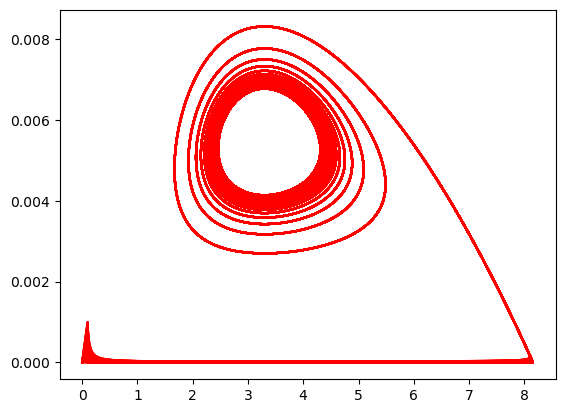

In [551]:
period_list = []
period_list_i = []
det_list = []
r_list = []

r = r_grid[0]
print(r)

fixed_point_x = delta * beta / (gamma * alpha - delta)
fixed_point_y = (r - c * fixed_point_x) * (fixed_point_x - mu) * (fixed_point_x + beta) / (alpha * (fixed_point_x + nu))

x_grid = [100 * (i + 1) / 100000 for i in range(100)]
y_grid = [(i + 1) / 100000 for i in range(100)]

for i in range(len(x_grid)):

    params_r = params.copy()
    params_r.append(r)

    x_0 = np.array([x_grid[i], y_grid[i]])
    print(x_0)
    if len(x_0) > 0:
        x_0 = np.array(x_0)

        path = midpoint_method(x_0.copy(), 100000, 1000, pop_model, params_r)
        A = np.array(path)

        y = A[:,1]
        x = A[:,0]
        print(x[len(x)-1], y[len(y)-1])
        plt.plot(x,y, color="red")




(0.0, 0.05)

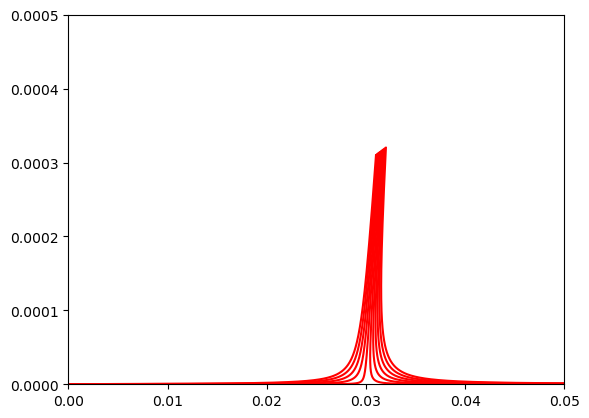

In [552]:
x_grid2 = [0.031 + i / 10000 for i in range(11)]
y_grid2 = [0.00031 + i / 1000000 for i in range(11)]

for i in range(len(x_grid2)):
    

    path = midpoint_method(np.array([x_grid2[i], y_grid2[i]]), 100000, 1000, pop_model, params_r)
    A = np.array(path)

    y = A[:,1]
    x = A[:,0]
    plt.plot(x,y, color="red")

plt.ylim(0.0, 0.0005)
plt.xlim(0.0, 0.05)

In [553]:
def get_linear(x, y, params):
    
    c, mu, nu, alpha, beta, gamma, delta, r = params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7]
    
    
    A_11 = -2 * c * x ** 3 + r * x ** 2 + c * mu * x ** 2 - 3 * c * nu * x ** 2 + 2 * r * nu * x + 2 * c * mu * nu * x - r * mu * nu
    A_11 = A_11 / ((x + nu) ** 2)
    A_11 = A_11 - alpha * y * beta / ((x + beta) ** 2)

    A_22 = gamma * alpha * x / (x + beta) - delta
    
    A_12 = -alpha * x / (x + beta)
    A_21 = gamma * alpha * y * beta / ((x + beta) ** 2)
    
    A = np.array([[A_11, A_12], [A_21, A_22]])
    
    return A

In [554]:
D = get_linear(0.03, 0.0, params_r)
print(D)
print(np.linalg.eig(D))

stab = np.linalg.eig(D)[1][0]

[[  1.40390909 -15.68627451]
 [  0.          -2.1372549 ]]
(array([ 1.40390909, -2.1372549 ]), array([[1.        , 0.975453  ],
       [0.        , 0.22020774]]))


[0.19, 0.03, 0.003, 800, 1.5, 0.004, 2.2, 1.55]


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_21718/3019730190.py:6: RuntimeWarning: overflow encountered in scalar multiply
  del_x = r * x[0] * (1 - c * x[0] / r) * ((x[0] - mu) / (x[0] + nu)) - eat
/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_21718/3019730190.py:5: RuntimeWarning: invalid value encountered in scalar divide
  eat = alpha * x[0] * x[1] / (beta + x[0])
/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_21718/3019730190.py:6: RuntimeWarning: invalid value encountered in scalar divide
  del_x = r * x[0] * (1 - c * x[0] / r) * ((x[0] - mu) / (x[0] + nu)) - eat


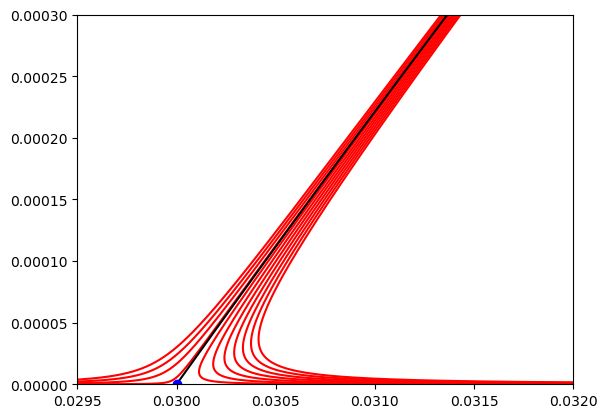

In [559]:
x_grid2 = [0.0314 + i / 100000 for i in range(11)]
y_grid2 = [0.000314 + i / 10000000 for i in range(11)]

print(params_r)

for i in range(len(x_grid2)):
    

    path = midpoint_method(np.array([x_grid2[i], y_grid2[i]]), 100000, 1000, pop_model, params_r)
    A = np.array(path)

    y = A[:,1]
    x = A[:,0]
    plt.plot(x,y, color="red")
    
path = midpoint_method(np.array([mu, 0.000000001]), 100000, -1000, pop_model, params_r)
A = np.array(path)

y = np.array(A[:,1])
x = np.array(A[:,0])
plt.plot(x[y < y_grid2[-1]],y[y < y_grid2[-1]], color="black")

plt.ylim(0.000, 0.0003)
plt.xlim(0.0295, 0.032)
plt.plot([mu],[0],color="blue",marker="o")

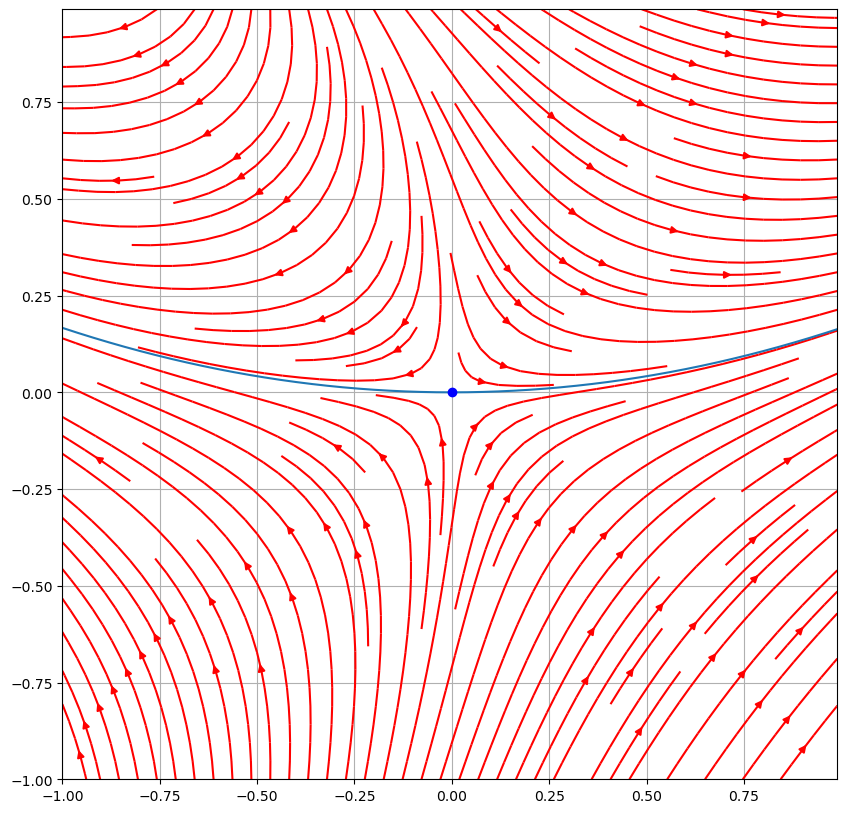

In [565]:
 
x = np.arange(-1,1,0.01) 
y = np.arange(-1,1,0.01) 
  
# Meshgrid 
X,Y = np.meshgrid(x,y) 
  
# Assign vector directions 
Ex = 2 * X + Y ** 2
Ey = -2 * Y + X ** 2 + Y ** 2
  
# Depict illustration 
plt.figure(figsize=(10, 10)) 
plt.streamplot(X,Y,Ex,Ey, density=1.4, linewidth=None, color='red') 
plt.plot(x, np.array([a ** 2 / 6 for a in x]))
plt.plot(0,0,'-ob') 
  
# Show plot with grid 
plt.grid() 
plt.show()